# Typilus

In [11]:
from data_preparation.scripts.graph_generator import extract_graphs
from data_preparation.scripts.utils import split
from typilus.utils.scripts import compute_per_kind_stats
from typilus.utils.scripts import compute_rare_common_stats
from typilus.utils import test, train, tensorise, index, predict
from dpu_utils.utils import RichPath, load_jsonl_gz, save_jsonl_gz
from os.path import join

## Paths

In [12]:
DATASET = '/home/amir/projects/ML4SE/data/full_dataset/'
DUPLICATES_FILES = '/home/amir/projects/ML4SE/output_duplicates/full_data_dups_knn_fixed.jsonl.gz'
GRAPHS = '/home/amir/projects/typilus/output_graphs_full/'

In [6]:
# import re
# def repair_data_path(path):
#     rep_path = {"/full_data/": '/full_dataset/', "/Users/": '/home/'}
#     regex = re.compile("(%s)" % "|".join(map(re.escape, rep_path.keys())))
#     return regex.sub(lambda mo: rep_path[mo.string[mo.start():mo.end()]], path)

# fixed_paths = []
# for l in load_jsonl_gz(DUPLICATES_FILES):
#     fixed_paths.append([repair_data_path(f) for f in l])
# save_jsonl_gz(fixed_paths, )

In [13]:
#TEST_DATA = '/home/amir/projects/typilus/graph_full_data_split/test'
SPLIT_DIR = join(GRAPHS, 'split')
MODEL_DIR = join(GRAPHS, 'model')
TENSORIZED_DIR = join(GRAPHS, 'tensorzied')

MODEL_PATH = join(MODEL_DIR, 'Graph2HybridMetric_ABCMeta-2020-10-04-18-46-26_model_best.pkl.gz') 
#MODEL = '/home/amir/projects/typilus/saved_model/Graph2HybridMetric_graph2hybridmetric-2020-06-29-23-04-05_model_best.pkl.gz'

PREDICTIONS = join(GRAPHS, 'pred', 'typilus_data_pred_temp.jsonl.gz')
#PREDICTIONS = join(GRAPHS, 'pred', 'typilus_data_pred.jsonl.gz')
# '/home/amir/projects/typilus/typlilus_results.jsonl.gz'

TYPE_LATICE_PATH = join(GRAPHS, '_type_lattice.json.gz')
# '/home/amir/projects/typilus/graph_full_data/_type_lattice.json.gz'

ALIAS_METADATA = '/home/amir/projects/typilus/src/data_preparation/metadata/typingRules.json'
JSON_RESULTS = join(GRAPHS, 'results', 'preds_overall.json')
#JSON_RESULTS = '/home/amir/projects/typilus/output/results/json_overall.json' #'/home/amir/projects/typilus/json_results.json'
FIGS_DIR = join(GRAPHS, 'figs')

## Extract graphs

In [ ]:
extract_graphs.extract(DATASET, DUPLICATES_FILES, GRAPHS, ALIAS_METADATA)

Split extracted graphs into train, test and valid sets

In [12]:
split.split_graphs(GRAPHS, SPLIT_DIR)

36it [1:30:56, 151.58s/it]


## Create tensors

Train set

In [13]:
tensorise.create('graph2hybridmetric', join(TENSORIZED_DIR, 'train'), [join(SPLIT_DIR, 'train')])

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
/home/amir/py_venv/py_dl_tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Tensorised 30981 (123212 before filtering) samples from '/home/amir/projects/typilus/output_graphs_full/split/train' into '/home/amir/projects/typilus/output_graphs_full/tensorzied/train'.


Validation set

In [14]:
tensorise.create('graph2hybridmetric', join(TENSORIZED_DIR, 'valid'), [join(SPLIT_DIR, 'valid')],
                 join(TENSORIZED_DIR, 'train', 'metadata.pkl.gz'))

Tensorised 4559 (17609 before filtering) samples from '/home/amir/projects/typilus/output_graphs_full/split/valid' into '/home/amir/projects/typilus/output_graphs_full/tensorzied/valid'.


## Train a model

In [341]:
train.start(join(TENSORIZED_DIR, 'train'), join(TENSORIZED_DIR, 'valid'),
            MODEL_DIR, 'graph2hybridmetric')

Starting training run ABCMeta-2020-10-12-12-17-13 of model Graph2HybridMetric with following hypers:
{
  "cg_ggnn_graph_rnn_activation": "tanh",
  "cg_ggnn_graph_rnn_cell": "GRU",
  "cg_ggnn_hidden_size": 64,
  "cg_ggnn_layer_timesteps": [
    7,
    1
  ],
  "cg_ggnn_message_aggregation": "max",
  "cg_ggnn_residual_connections": {
    "1": [
      0
    ]
  },
  "cg_ggnn_use_edge_bias": false,
  "cg_ggnn_use_edge_msg_avg_aggregation": false,
  "cg_ggnn_use_propagation_attention": false,
  "cg_node_label_char_length": 16,
  "cg_node_label_embedding_size": 64,
  "cg_node_label_embedding_style": "Subtoken",
  "cg_node_label_max_subtokens": 5,
  "cg_node_label_vocab_size": 10000,
  "dropout_keep_rate": 0.9,
  "excluded_cg_edge_types": [],
  "gradient_clip": 1,
  "learning_rate": 0.00025,
  "learning_rate_decay": 0.98,
  "margin": 2,
  "max_epochs": 500,
  "max_num_cg_nodes_in_batch": 80000,
  "max_type_annotation_vocab_size": 100,
  "momentum": 0.85,
  "optimizer": "Adam",
  "patience": 1

KeyboardInterrupt: 

In [15]:
train.start(join(TENSORIZED_DIR, 'train'), join(TENSORIZED_DIR, 'valid'),
            MODEL_DIR, 'graph2hybridmetric')

Starting training run ABCMeta-2020-10-04-18-46-26 of model Graph2HybridMetric with following hypers:
{
  "cg_ggnn_graph_rnn_activation": "tanh",
  "cg_ggnn_graph_rnn_cell": "GRU",
  "cg_ggnn_hidden_size": 64,
  "cg_ggnn_layer_timesteps": [
    7,
    1
  ],
  "cg_ggnn_message_aggregation": "max",
  "cg_ggnn_residual_connections": {
    "1": [
      0
    ]
  },
  "cg_ggnn_use_edge_bias": false,
  "cg_ggnn_use_edge_msg_avg_aggregation": false,
  "cg_ggnn_use_propagation_attention": false,
  "cg_node_label_char_length": 16,
  "cg_node_label_embedding_size": 64,
  "cg_node_label_embedding_style": "Subtoken",
  "cg_node_label_max_subtokens": 5,
  "cg_node_label_vocab_size": 10000,
  "dropout_keep_rate": 0.9,
  "excluded_cg_edge_types": [],
  "gradient_clip": 1,
  "learning_rate": 0.00025,
  "learning_rate_decay": 0.98,
  "margin": 2,
  "max_epochs": 500,
  "max_num_cg_nodes_in_batch": 80000,
  "max_type_annotation_vocab_size": 100,
  "momentum": 0.85,
  "optimizer": "Adam",
  "patience": 1

  Epoch 46 (train) took 260.43s [processed 118 samples/second]. Loss so far: 2.9266.   
 Training Loss: 2.934153
  Epoch 46 (valid) took 25.31s [processed 180 samples/second]oss so far: 0.0000.   
 Validation Loss: 3.125439
==== Epoch 47 ====
  Epoch 47 (train) took 260.04s [processed 119 samples/second]. Loss so far: 2.9198.   
 Training Loss: 2.924506
  Epoch 47 (valid) took 25.16s [processed 181 samples/second]oss so far: 0.0000.   
 Validation Loss: 3.097650
==== Epoch 48 ====
  Epoch 48 (train) took 261.16s [processed 118 samples/second]. Loss so far: 2.9136.   
 Training Loss: 2.926063
  Epoch 48 (valid) took 25.28s [processed 180 samples/second]oss so far: 0.0000.   
 Validation Loss: 3.065548
  Best result so far -- saving model as '/home/amir/projects/typilus/output_graphs_full/model/Graph2HybridMetric_ABCMeta-2020-10-04-18-46-26_model_best.pkl.gz'.
==== Epoch 49 ====
  Epoch 49 (train) took 259.50s [processed 119 samples/second]. Loss so far: 2.9019.   
 Training Loss: 2.9109

/home/amir/projects/typilus/output_graphs_full/model/Graph2HybridMetric_ABCMeta-2020-10-04-18-46-26_model_best.pkl.gz

In [351]:
from typilus.model import model, model_restore_helper, codegraphmodel, graph2hybridmetric
from importlib import reload
reload(model)
reload(graph2hybridmetric)
reload(codegraphmodel)
reload(model_restore_helper)

<module 'typilus.model.model_restore_helper' from '/home/amir/projects/typilus/src/typilus/model/model_restore_helper.py'>

Create TypeMap

In [4]:
index.start(RichPath.create(MODEL_PATH), RichPath.create(join(SPLIT_DIR, 'train')),
            RichPath.create(join(SPLIT_DIR, 'valid')))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.


## Prediction

In [352]:
predict.run_predict(RichPath.create(MODEL_PATH),
                    RichPath.create(join(SPLIT_DIR, 'test')),
                    RichPath.create(PREDICTIONS))

single prediction in 0.000004 sec.
single prediction in 0.000004 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000002 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000003 sec.
single prediction in 0.000002 sec.
single prediction in

KeyboardInterrupt: 

## Evaluation

Predict and overall results

In [6]:
test.run_test(PREDICTIONS, RichPath.create(TYPE_LATICE_PATH),
              RichPath.create(ALIAS_METADATA), JSON_RESULTS, 10, False)

variable, parameters, returns type

In [236]:
compute_per_kind_stats.compute(RichPath.create(PREDICTIONS),
                               RichPath.create(TYPE_LATICE_PATH),
                               RichPath.create(ALIAS_METADATA),
                               JSON_RESULTS, top_n=10)

17293 nodes of 246366 did not have a supertype/parent. Adding a link to bottom, for now.


== Exact Match
parameter: 62.27 (45760/73492)
Common - parameter: 86.46
Rare - parameter: 29.88


/home/amir/py_venv/py_dl_tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amir/py_venv/py_dl_tf/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


parameter: F1: 59.00 R: 62.27 P: 58.27
******************************
class-or-function: 51.85 (15972/30807)
Common - class-or-function: 82.56
Rare - class-or-function: 19.72
class-or-function: F1: 47.81 R: 51.85 P: 46.52
******************************
== Up to Parametric
parameter: 70.37 (51718/73492)
Common - parameter: 89.41
Rare - parameter: 44.89
******************************
class-or-function: 66.71 (20552/30807)
Common - class-or-function: 86.46
Rare - class-or-function: 46.06
******************************
Precision: 54.95
Recall: 59.19
F1-score: 55.74
******************************
Exact - All: 59.19 common: 85.40 rare: 26.59
Parameteric - All: 69.29 common: 88.60 rare: 45.27


Common and rare type

In [4]:
compute_rare_common_stats.compute(JSON_RESULTS)

Accuracy of Common 76.982836%
Accuracy Upto Parametric of Common 81.343895%
Accuracy of Rare 33.606095%
Accuracy Upto Parametric of Rare 50.536117%


## Visualizing Type Space

In [14]:
from typilus.model import model_restore_helper
from sklearn.manifold import TSNE
import annoy
import tempfile
import re
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.reset_defaults()

In [15]:
m = model_restore_helper.restore(RichPath.create(MODEL_PATH), is_train=False, 
                                 hyper_overrides={'run_id': 'indexing',
                                 "dropout_keep_rate": 1.0,})

Number of trainable model parameters

In [307]:
sum([np.prod(v.get_shape().as_list()) for p, v in m.parameters.items()])

650788

In [10]:
len(m.metadata['indexed_element_types'])

492235

In [16]:
type_indices = [(i, x) for i, x in enumerate(m.metadata['indexed_element_types']) if x in ['mxnet.nd.NDArray', 
                                                                                                          'list',
                                                                                                          'torch.Tensor', 
                                                                                                          'numpy.array',
                                                                                                          'pandas.DataFrame',
                                                                                                          '']]

In [17]:
type_indices = type_indices + random.sample([(i, x.split('.')[-1]) for i, x in enumerate(m.metadata['indexed_element_types']) if x in ['int']], 1000)

In [18]:
# commonPy.asnParser.AST_Lookup
# mock_vws.database.VuforiaDatabase
# basilisp.lang.runtime.Namespace
# django.conf.settings.AUTH_USER_MODEL
# pandas.DataFrame
# int

In [19]:
len(type_indices)

8017

In [180]:
for i in m.metadata['indexed_element_types']:
    if "mxnet.nd.NDArray" in i:
        print(i)

typing.Dict[typing.Text, mxnet.nd.NDArray]
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
typing.Optional[mxnet.nd.NDArray]
typing.Optional[mxnet.nd.NDArray]
mxnet.nd.NDArray
typing.Tuple[mxnet.nd.NDArray, mxnet.nd.NDArray, ModelState]
mxnet.nd.NDArray
typing.List[mxnet.nd.NDArray]
mxnet.nd.NDArray
typing.Union[mxnet.nd.NDArray, float]
typing.Union[mxnet.nd.NDArray, int, float]
typing.Tuple[mxnet.nd.NDArray, int]
mxnet.nd.NDArray
mxnet.nd.NDArray
typing.Tuple[mxnet.nd.NDArray, mxnet.nd.NDArray, typing.List[ModelState]]
mxnet.nd.NDArray
typing.List[mxnet.nd.NDArray]
typing.List[mxnet.nd.NDArray]
typing.Tuple[mxnet.nd.NDArray, mxnet.nd.NDArray]
typing.List[mxnet.nd.NDArray]
typing.List[mxnet.nd.NDArray]
typing.Tuple[mxnet.nd.NDArray, mxnet.nd.NDArray, mxnet.nd.NDArray, mxnet.nd.NDArray, typing.Optional[typing.List[BeamHistory]]]
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
mxnet.nd.NDArray
typi

In [20]:
def load_knn_index(metadata, repr_size):
    if not isinstance(metadata['index'], annoy.AnnoyIndex):
        with tempfile.NamedTemporaryFile() as f:
            with open(f.name, 'wb') as fout:
                fout.write(metadata['index'])
            metadata['index'] = annoy.AnnoyIndex(repr_size, 'manhattan')
            metadata['index'].load(f.name)
    return metadata

In [21]:
m.metadata_fixed = load_knn_index(m.metadata, m.get_default_hyperparameters()['cg_ggnn_hidden_size'])

In [22]:
x_types = [m.metadata_fixed['index'].get_item_vector(i) for i, t in type_indices]

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=512)

In [24]:
tsne_rand_embed_types = tsne.fit_transform(x_types)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8017 samples in 0.064s...
[t-SNE] Computed neighbors for 8017 samples in 4.838s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8017
[t-SNE] Computed conditional probabilities for sample 2000 / 8017
[t-SNE] Computed conditional probabilities for sample 3000 / 8017
[t-SNE] Computed conditional probabilities for sample 4000 / 8017
[t-SNE] Computed conditional probabilities for sample 5000 / 8017
[t-SNE] Computed conditional probabilities for sample 6000 / 8017
[t-SNE] Computed conditional probabilities for sample 7000 / 8017
[t-SNE] Computed conditional probabilities for sample 8000 / 8017
[t-SNE] Computed conditional probabilities for sample 8017 / 8017
[t-SNE] Mean sigma: 0.128027
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.579056
[t-SNE] KL divergence after 512 iterations: 1.660192


In [37]:
df = pd.DataFrame(tsne_rand_embed_types, columns=['tsne-2d-one', 'tsne-2d-two'])
df['Types'] = [t for i, t in type_indices]
df.set_index('Types')

,tsne-2d-one,tsne-2d-two
Types,,
numpy.array,-29.435818,-7.736310
list,-32.200817,1.473799
pandas.DataFrame,-3.619647,-4.278666
pandas.DataFrame,1.873669,-33.099098
pandas.DataFrame,-25.320269,-34.910084
...,...,...
int,19.963030,39.876701
int,26.260523,36.414108
int,-3.173653,29.567015


In [38]:
df['Types'].unique()

array(['numpy.array', 'list', 'pandas.DataFrame', 'torch.Tensor',
       'mxnet.nd.NDArray', 'int'], dtype=object)

In [39]:
# df.reindex(['mxnet.nd.NDArray', 'list', 'torch.Tensor', 'numpy.array', 'pandas.DataFrame',
#                      'int'])
#df.set_index('Types')
def sorter(col):
    return pd.Series(pd.Categorical(col, categories=['int', 'pandas.DataFrame', 'numpy.array', 'torch.Tensor',
                                                     'list', 'mxnet.nd.NDArray'], ordered=True))
    

df = df.sort_values(by='Types', key=sorter)

In [40]:
df['Types'] = df['Types'].map({'pandas.DataFrame': 'pd.DataFrame', 'numpy.array': 'np.array',
                               'mxnet.nd.NDArray': 'NDArray', 'int': 'int', 'torch.Tensor': 'torch.Tensor', 
                              'list': 'list'})

In [41]:
df.head()

,tsne-2d-one,tsne-2d-two,Types
8016,18.284431,30.931543,int
7357,24.712906,28.032757,int
7356,16.348833,36.374748,int
7355,25.229197,24.750957,int
7354,20.253756,20.265068,int


In [59]:
plt.figure(figsize=(16, 10))
tsne_plot = sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two',
                hue="Types", palette=sns.color_palette("bright", 6),
                data=df, alpha=0.3, legend="full")
#tsne_plot.set(xlabel="x", ylabel="y")
tsne_plot.set_xlabel("x", fontsize=20)
tsne_plot.set_ylabel("y", fontsize=20)
plt.legend(fontsize='xx-large', title_fontsize='22', title="Types")

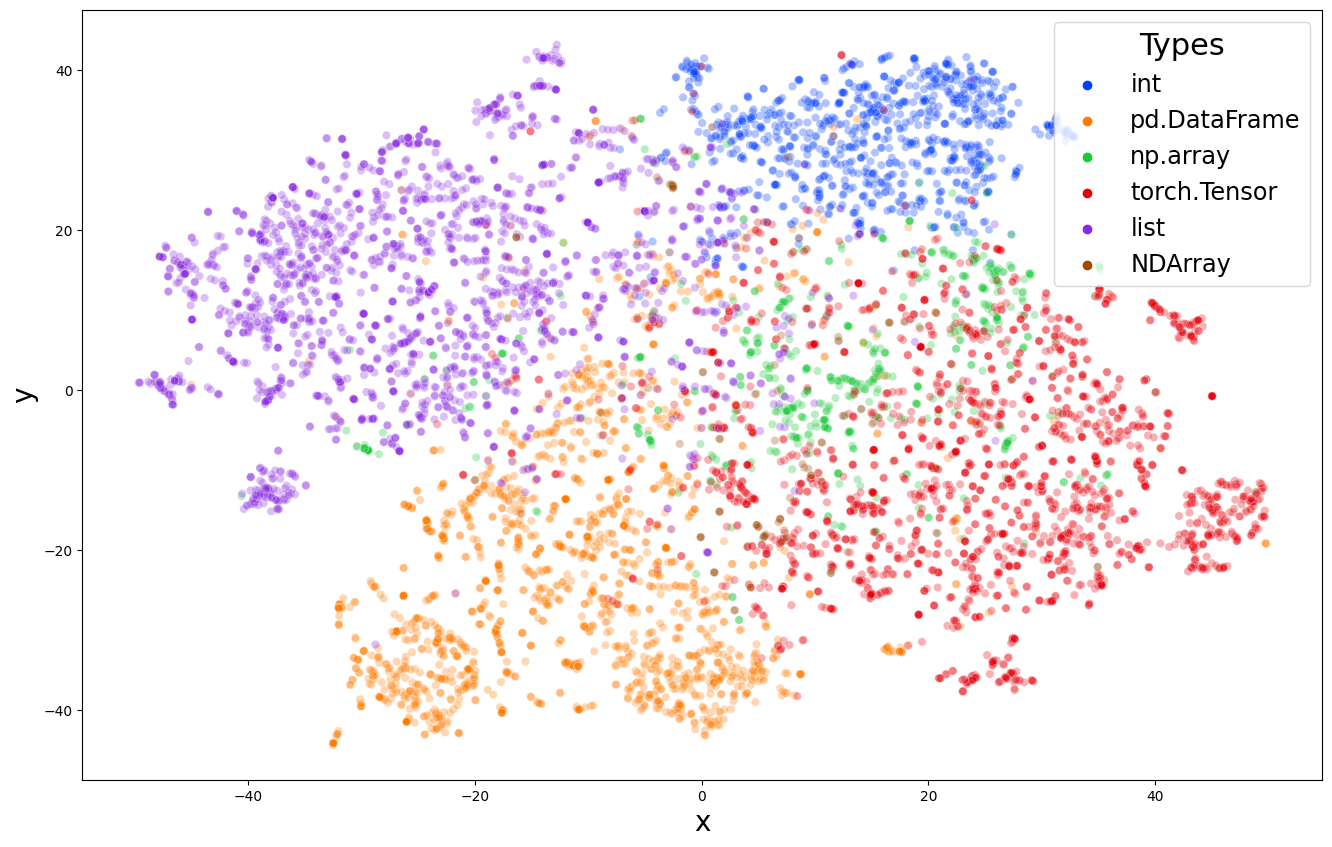

In [60]:
plt.show()

In [61]:
tsne_plot.get_figure().savefig(join(FIGS_DIR, 'tsne_plot_typilus_6t.pdf'), format='pdf',
                               bbox_inches='tight', dpi=256)

In [32]:
df.to_csv(join(GRAPHS, 'results', 'tsne-points_typilus.csv'), index=False)

## Qualitative evaluation

In [285]:
preds = RichPath.create(PREDICTIONS).read_as_jsonl()

In [250]:
ML_PARAM_TW_TEST = '/home/amir/projects/ML4SE/output_jun8/ml_inputs/_ml_param_test.csv'
ML_RET_TW_TEST = '/home/amir/projects/ML4SE/output_jun8/ml_inputs/_ml_ret_test.csv'

df_test_samples = pd.concat([pd.read_csv(ML_PARAM_TW_TEST), pd.read_csv(ML_RET_TW_TEST).rename({'name': 'func_name'})],
                   axis=0, ignore_index=True)[['file', 'func_name', 'arg_name', 'arg_type', 'return_type']]

In [260]:
df_test_samples['file'].iloc[1]

'/home/amir/projects/ML4SE/data/full_dataset/matthewdeanmartin/pypi_librarian/pypi_librarian/download.py'

In [286]:
def find_corr_pred(org_type, preds_list):
    for t, s in preds_list:
        if t == org_type:
            return t
    return preds_list[0][0]

selected_preds = []
for p in preds:
    if p['annotation_type'] != 'variable' and p['original_annotation'] != None:
        selected_preds.append([join('/home/amir/projects/ML4SE/data/full_dataset/', p['provenance']),
                               p['original_annotation'], p['annotation_type'], 
                               find_corr_pred(p['original_annotation'], p['predicted_annotation_logprob_dist']),
                               p['predicted_annotation_logprob_dist']])

In [287]:
df_test_sel = pd.DataFrame(selected_preds, columns=['file', 'original_annotation', 'annotation_type', 'pred_type',
                                                    'preds_list'])

In [288]:
df_test_sel.head()

,file,original_annotation,annotation_type,pred_type,preds_list
0,/home/amir/projects/ML4SE/data/full_dataset/tw...,logging.Handler,parameter,logging.Handler,"[[hints.Predicate, -1.273823442843183], [loggi..."
1,/home/amir/projects/ML4SE/data/full_dataset/tw...,bytes,class-or-function,bytes,"[[typing.Text, -0.41871258376401277], [typing...."
2,/home/amir/projects/ML4SE/data/full_dataset/tw...,typing.Text,parameter,typing.Text,"[[typing.Text, 2.2204460492503128e-16]]"
3,/home/amir/projects/ML4SE/data/full_dataset/tw...,lxml.etree.Element,class-or-function,bytes,"[[bytes, -0.09133563237055124], [typing.Option..."
4,/home/amir/projects/ML4SE/data/full_dataset/tw...,bytes,parameter,bytes,"[[bytes, -0.08567410578803228], [typing.Text, ..."


In [291]:
df_test_sel[df_test_sel['file'].isin(df_test_samples['file'])].to_csv(join(GRAPHS, 'pred',
                                                                           'selected_typilus_preds.csv'),
                                                                      index=False)